In [1]:
import os
ROOT = os.path.dirname(os.path.dirname(os.getcwd()))
print(ROOT)

/home/saisampathkedari/MonteCarlo-Statistical-Methods


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [3]:
from utils.montecarlo import *
from mcmc.algorithms.metropolis_hastings import *
from mcmc.utils.mcmc_utils import *
from mcmc.diagnostics.autocorrelation import *
from mcmc.utils.run_helpers import *
from mcmc.diagnostics.iac_and_ess import *
from mcmc.algorithms.adaptive_metropolis import *

# Adaptive Metropolis for 2D Gaussian Distribution

In [4]:
# Target Distribution 
target_mean = np.array([1,2])
target_cov = build_2D_covariance_matrix(1,1,0.5)
target_logpdf = lambda x: multivariate_normal_logpdf_eval(x.reshape(1,-1), mean=target_mean, cov=target_cov)[0]

# initial conditions
initial_sample = np.array([10,10])
initial_cov = build_2D_covariance_matrix(1,1,0.5) # from Laplace Approximation
num_samples = 50000

# Proposal Distribution properties
proposal_logpdf = proposal_mvn_logpdf_eval
proposal_sampler = proposal_mvn_sampler


## Metropolis-Hastings 
am_samples = am_mcmc(initial_sample, initial_cov, num_samples, target_logpdf, proposal_logpdf, proposal_sampler, freq_of_update=200, verbose=True)

samples = am_samples.samples
print("Accepted Samples Ratio:", am_samples.accept_rate)

Finished sample 1000, acceptance ratio = 0.218
Finished sample 2000, acceptance ratio = 0.260
Finished sample 3000, acceptance ratio = 0.279
Finished sample 4000, acceptance ratio = 0.290
Finished sample 5000, acceptance ratio = 0.304
Finished sample 6000, acceptance ratio = 0.313
Finished sample 7000, acceptance ratio = 0.320
Finished sample 8000, acceptance ratio = 0.322
Finished sample 9000, acceptance ratio = 0.326
Finished sample 10000, acceptance ratio = 0.327
Finished sample 11000, acceptance ratio = 0.330
Finished sample 12000, acceptance ratio = 0.330
Finished sample 13000, acceptance ratio = 0.333
Finished sample 14000, acceptance ratio = 0.335
Finished sample 15000, acceptance ratio = 0.336
Finished sample 16000, acceptance ratio = 0.338
Finished sample 17000, acceptance ratio = 0.338
Finished sample 18000, acceptance ratio = 0.338
Finished sample 19000, acceptance ratio = 0.337
Finished sample 20000, acceptance ratio = 0.337
Finished sample 21000, acceptance ratio = 0.338
F

## Burn-in

In [5]:
new_mh_result= mcmc_burnin_and_thin(am_samples, burnin_frac=0.5, thin_frac=1)
samples = new_mh_result.samples
print("Accepted Samples Ratio:", new_mh_result.accept_rate)

Accepted Samples Ratio: 0.35104


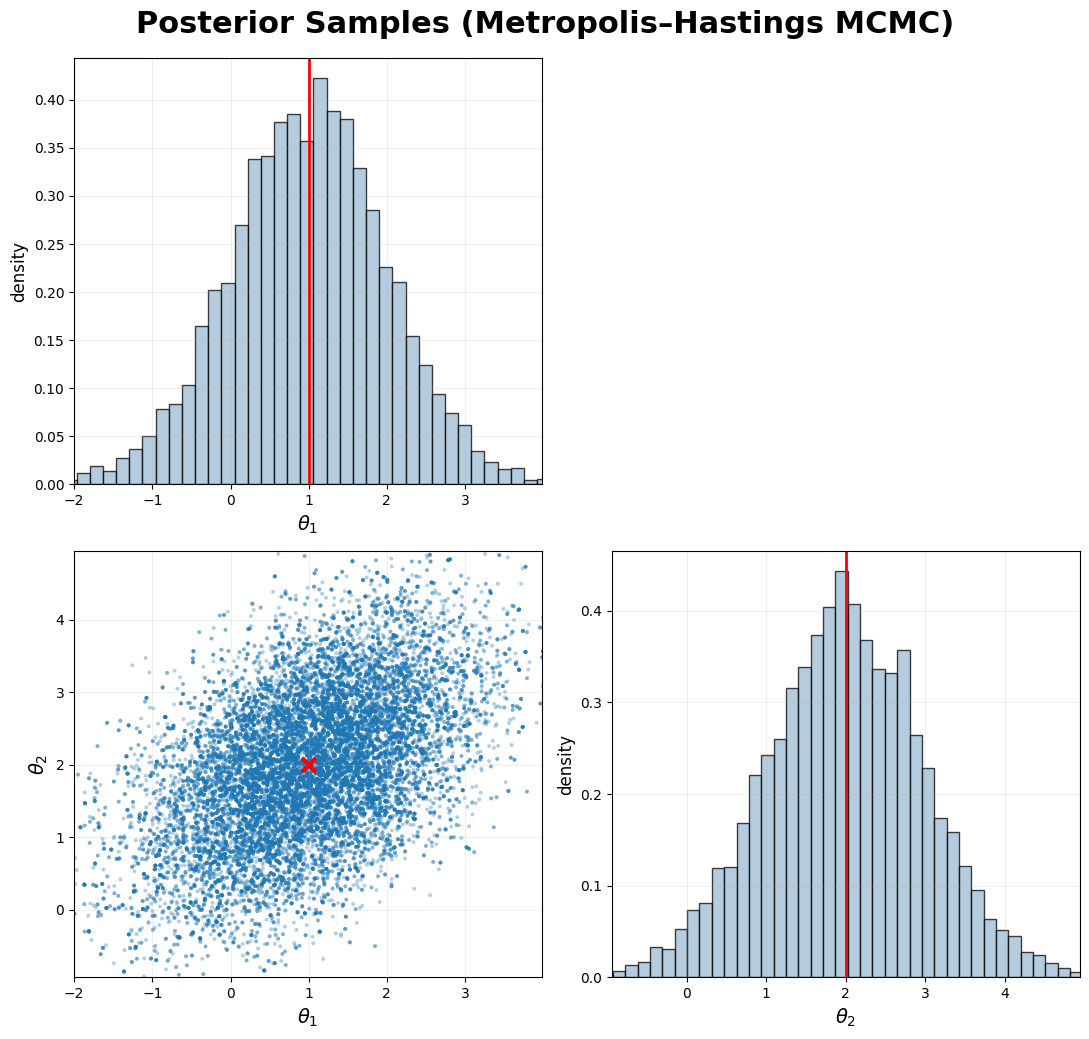

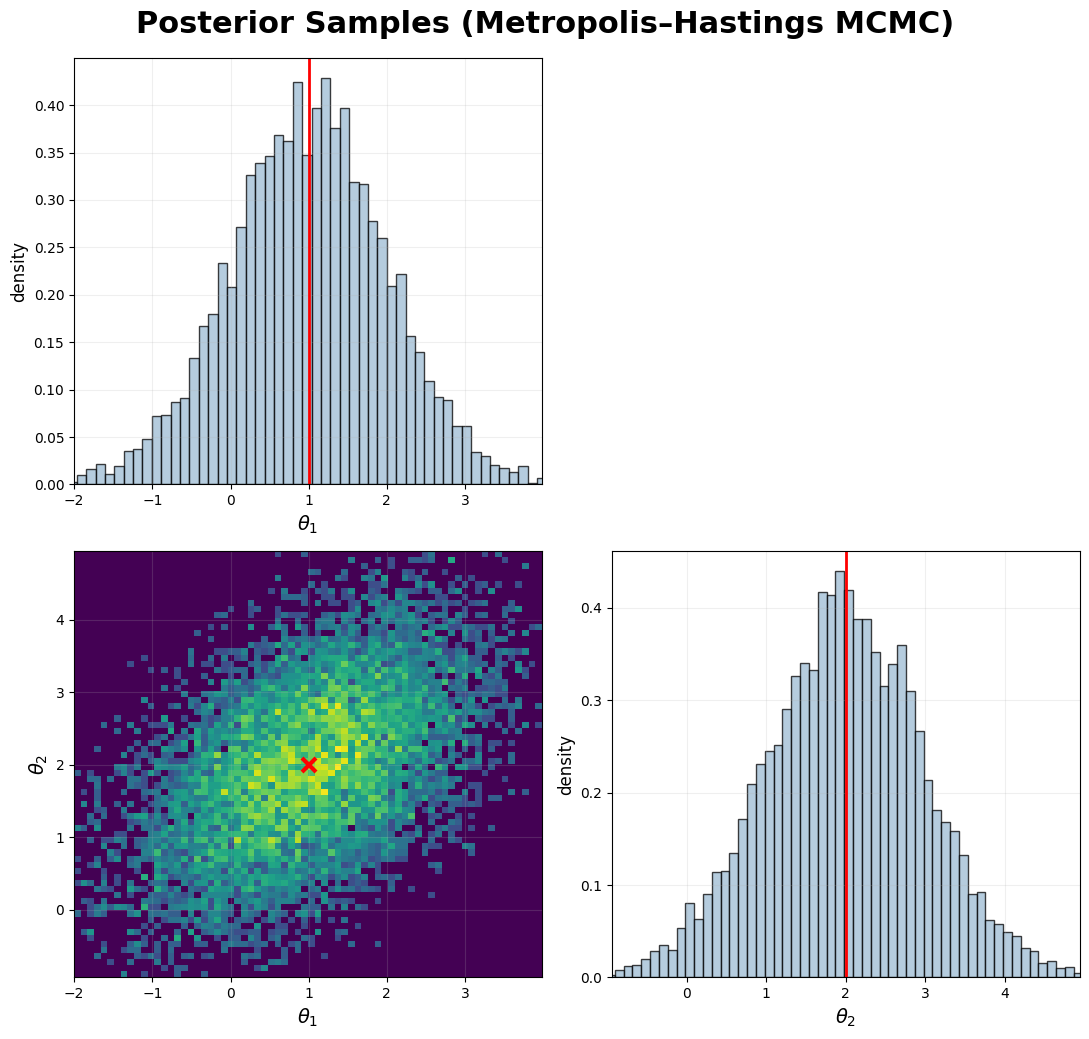

In [6]:
plt.close()
fig, axs, gs = scatter_matrix_clean(
    11,
    [samples],
    truths=target_mean,          # or None
    labels=[r"$\theta_1$", r"$\theta_2$"],
    hist_plot=False,
)
plt.show()

plt.close(12)
fig, axs, gs = scatter_matrix_clean(
    12,
    [samples],
    truths=target_mean,
    labels=[r"$\theta_1$", r"$\theta_2$"],
    hist_plot=True,
    nbins=70
)
plt.show()

## Mixing

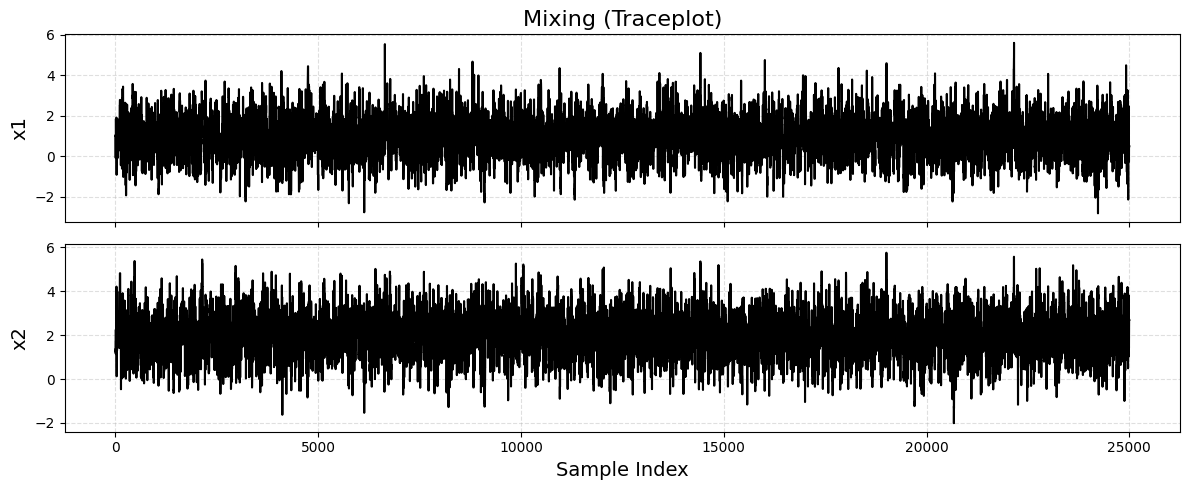

In [7]:

plot_mixing_2d(samples, dim_names=("x1", "x2"))

## Autocorrelation

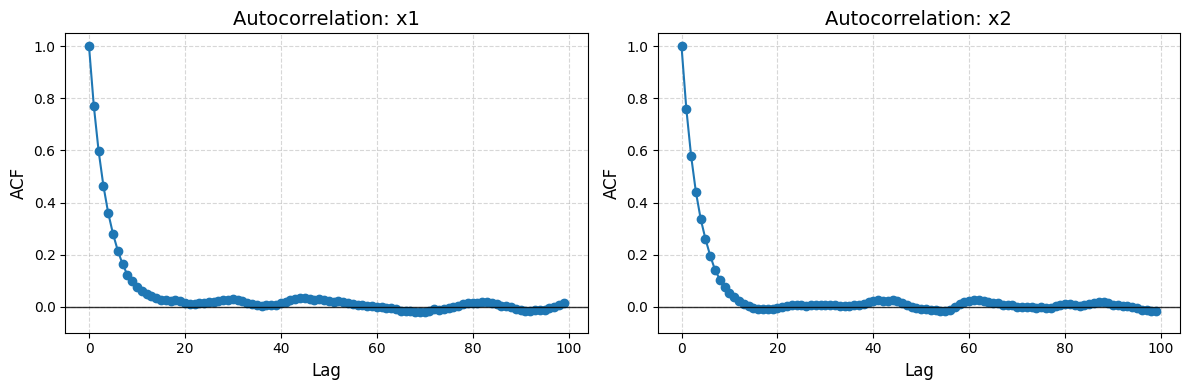

In [8]:
lags, acf = autocorrelation_vectorized(samples, max_lag=100)
plot_autocorrelation_2d(lags, acf, dim_names=("x1", "x2"))

## Integrated Auto-Correlation & Effective Sample Size

In [9]:
iac, acf, lags = integrated_autocorrelation(samples, max_lag=300)
ess = effective_sample_size(samples, iac)

N = samples.shape[0]
efficiency = ess / N * 100  # percentage

print(f"Total samples: {N}\n")

for k in range(len(iac)):
    print(f"Dimension {k}:")
    print(f"  IAC:          {iac[k]:.4f}")
    print(f"  ESS:          {ess[k]:.2f}")
    print(f"  Efficiency:   {efficiency[k]:.1f}%   "
          f"({efficiency[k]:.1f}% as effective as independent samples)")
    print()

Total samples: 25000

Dimension 0:
  IAC:          9.3020
  ESS:          2687.59
  Efficiency:   10.8%   (10.8% as effective as independent samples)

Dimension 1:
  IAC:          7.0301
  ESS:          3556.13
  Efficiency:   14.2%   (14.2% as effective as independent samples)

